In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [11]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = "../multi_parameter/coverage_rate_model_multi_parameter.nc"
variable_list = ['b_P']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "coverage_rate_interactions_multi"



transformations = {
    #'a_m': log_to_exp,
    #'b_p': log_to_exp,
    #'g_mp': log_to_exp

}

table_location = f"tables/{file_name}.csv"
image_location = f"posterior_distributions/{file_name}.png"


### Generate Summary object

In [12]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [13]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../multi_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'Coverage')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (16080, 24)
Parameter Matrix shape: (16080, 66)
Interaction Matrix shape: (16080, 1584)
Observation Matrix shape: (16080, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_mp[return_from_generator x ChromLen|TestDeleteProb],-1.521,1.472,-3.763,0.324,0.030,0.021,2435.0,8932.0,1.0
g_mp[return_from_generator x RandPert|TestInsertProb],-1.130,1.245,-3.073,0.485,0.022,0.016,3189.0,10427.0,1.0
g_mp[return_from_generator x Elite|TestChangeProb],-1.105,1.240,-3.036,0.504,0.022,0.015,3334.0,9022.0,1.0
g_mp[return_from_generator x ChromLen|TourSize],-0.906,1.129,-2.770,0.555,0.017,0.012,4620.0,10123.0,1.0
g_mp[return_from_generator x StatemInsertProb|TestDeleteProb],-0.889,1.136,-2.641,0.694,0.017,0.012,4972.0,9942.0,1.0
...,...,...,...,...,...,...,...,...,...
g_mp[return_from_generator x StatemInsertProb|TestChangeProb],1.157,1.258,-0.475,3.086,0.022,0.016,3188.0,9296.0,1.0
g_mp[packages x RandPert|TestInsertProb],1.207,1.296,-0.509,3.175,0.024,0.017,2861.0,8225.0,1.0
g_mp[return_from_generator x ChromLen|TestInsertionProb],1.249,1.318,-0.416,3.293,0.024,0.017,3150.0,9999.0,1.0
g_mp[return_from_generator x RandPert|TestInsertionProb],1.332,1.362,-0.430,3.412,0.026,0.018,2722.0,8998.0,1.0


### Save summary table as CSV

In [14]:
summary.to_csv(table_location, index=True)

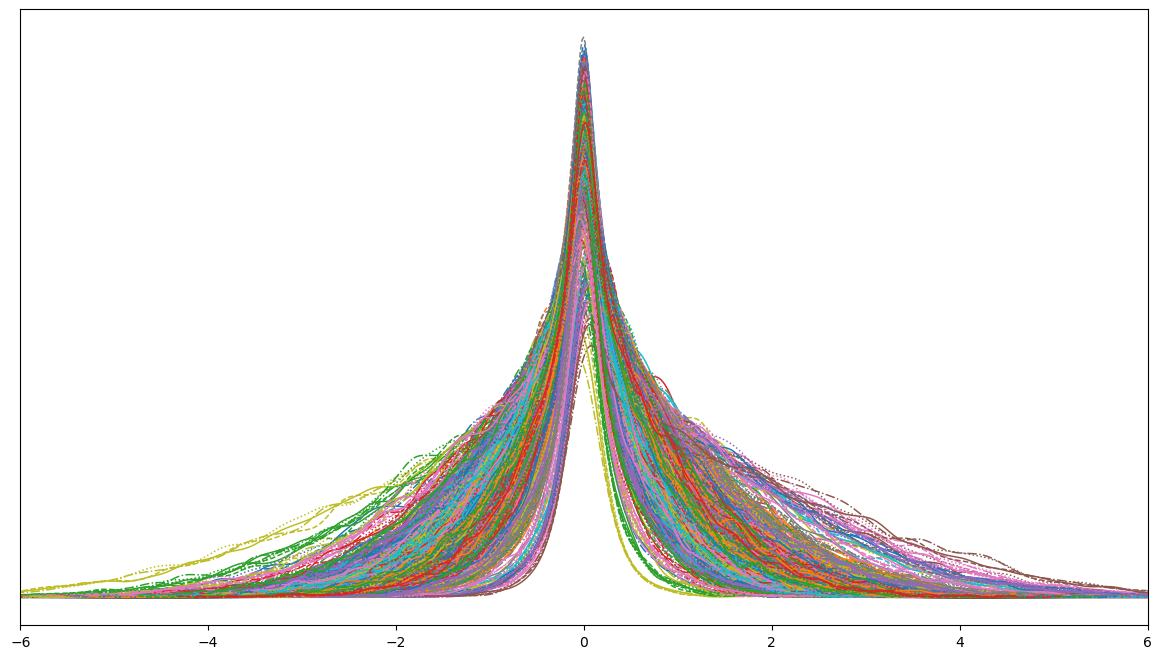

In [15]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4), dpi=300)
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)

axes[0, 0].set_xlim([-6, 6])


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()